#### **NAME: Jackline Mboya**
#### **ADM No: 193670**

**Week 4 Assignment**

#### **Unit Code: DSA 8302**
#### **Unit Name: Computational Techniques in Data Science**

### **Question 1: Shortest Path in a Road Network (Dijkstra’s Algorithm)**
A logistics company called Home Logistics wants to determine the most efficient route between two cities in a given road network. The network is represented as a graph where cities are nodes and roads are edges with weights corresponding to the travel distance (in kilometers). Given the following graph representation of a road network, write a Python program using Dijkstra’s Algorithm to find the shortest path from City A to City F.

Graph Data (as adjacency list):

roads = {

 'A': {'B': 4, 'C': 2},

 'B': {'A': 4, 'C': 5, 'D': 10},

 'C': {'A': 2, 'B': 5, 'D': 3, 'E': 8},

 'D': {'B': 10, 'C': 3, 'E': 6, 'F': 2},

 'E': {'C': 8, 'D': 6, 'F': 4},

 'F': {'D': 2, 'E': 4}

}

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Graph data
road_graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 8},
    'D': {'B': 10, 'C': 3, 'E': 6, 'F': 2},
    'E': {'C': 8, 'D': 6, 'F': 4},
    'F': {'D': 2, 'E': 4}
}

In [23]:
# Create weighted Graph
G = nx.Graph()
for node, edges in road_graph.items():
    for neighbor, weight in edges.items():
        G.add_edge(node, neighbor, weight=weight)

In [24]:
# Positioning the nodes

pos = nx.spring_layout(G, seed=42)

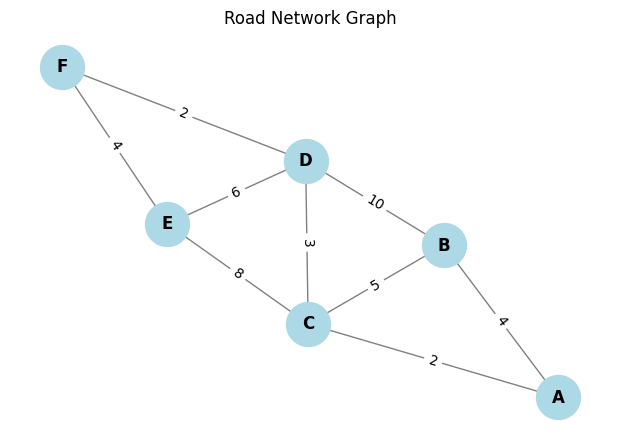

In [25]:
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12, font_weight='bold')
edge_labels = {(u, v): d['weight'] for u, v, d in G1.edges(data=True)}
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels, font_size=10)
plt.title("Road Network Graph")
plt.show()

In [26]:
# Apply Dijkstra's algorithm to find the shortest path and length
source_node = 'A'
target_node = 'F'

shortest_path = nx.dijkstra_path(G, source=source_node, target=target_node, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, source=source_node, target=target_node, weight='weight')

In [27]:
# Print
print("Shortest path from A to F:", " -> ".join(shortest_path))
print("Total distance:", shortest_path_length)


Shortest path from A to F: A -> C -> D -> F
Total distance: 7


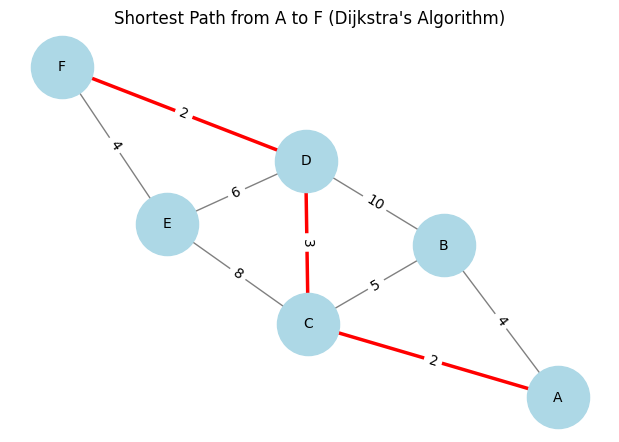

In [53]:
# Recreate the edge labels to ensure they are correctly formatted
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}

plt.figure(figsize=(6, 4))

#Full graph
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

# Highlight the shortest path in red
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5, arrows=True, arrowstyle='->', arrowsize=15)

# Plot edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Shortest Path from A to F (Dijkstra's Algorithm)")
plt.show()

### **Question 2: Influence Analysis in a Social Network (PageRank Algorithm)**
A social media platform wants to identify the most influential users based on follower relationships. The network is represented as a directed graph, where each user is a node, and an edge from user A to user B means that A follows B. Given the following directed graph of follower relationships, implement a Python program using the PageRank algorithm to rank users by influence.

Graph Representation:

followers = {

 'Alice': ['Bob', 'Charlie'],

 'Bob': ['Charlie', 'David'],

 'Charlie': ['David'],

 'David': ['Alice'],

 'Eve': ['Alice', 'Charlie']

}

Compute the PageRank scores and determine the most influential user.

In [36]:
# directed graph for follower relationship
social_graph = {
    'Alice': ['Bob', 'Charlie'],
    'Bob': ['Charlie', 'David'],
    'Charlie': ['David'],
    'David': ['Alice'],
    'Eve': ['Alice', 'Charlie']
}

In [37]:
# Create the graph
G1 = nx.DiGraph()
for node, neighbors in social_graph.items():
    for neighbor in neighbors:
        G1.add_edge(node, neighbor)

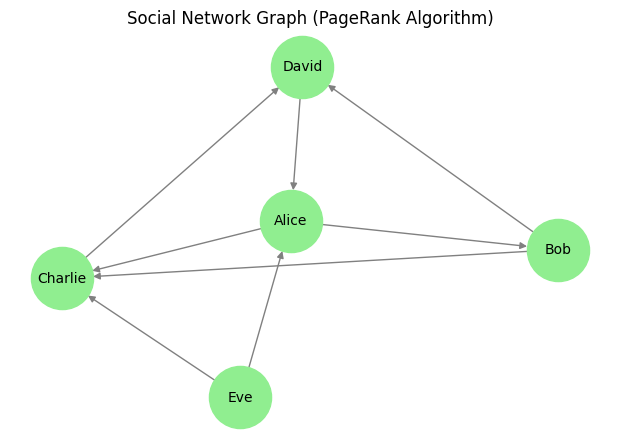

In [39]:
pos1 = nx.spring_layout(G1, seed=42)
plt.figure(figsize=(6, 4))
nx.draw(G1, pos1, with_labels=True, node_color="lightgreen", edge_color="gray", node_size=2000, font_size=10, arrows=True)
plt.title("Social Network Graph (PageRank Algorithm)")
plt.show()

In [40]:
# Calculate PageRank
pagerank_scores = nx.pagerank(G1)

In [41]:
# Sort users by PageRank scores
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)

In [42]:
# Print PageRank scores
print("PageRank Scores:")
for user, score in sorted_pagerank:
    print(f"{user}: {score:.4f}")

PageRank Scores:
David: 0.2926
Alice: 0.2915
Charlie: 0.2320
Bob: 0.1539
Eve: 0.0300


In [45]:
# Most influential user
most_influential_user = sorted_pagerank[0][0]
print(f"\nMost Influential User: {most_influential_user}")


Most Influential User: David


### **Question 3: Maximum Flow in a Water Distribution System (Ford-Fulkerson Algorithm)**
A city’s water supply system consists of reservoirs, pipelines, and distribution points. The system
is represented as a directed graph, where nodes represent junctions (reservoirs or city areas) and
edges represent water pipelines with capacity limits. Given the following network, where the
source is S (reservoir) and the sink is T (city distribution center), use the Ford-Fulkerson
algorithm to determine the maximum amount of water that can be transported to the city.
Graph Representation (with capacities):

water_network = {

  'S': {'A': 16, 'B': 13},

  'A': {'B': 10, 'C': 12},

  'B': {'D': 14},
  
  'C': {'B': 9, 'T': 20},
  
  'D': {'C': 7, 'T': 4},
  
  'T': {}

}

Write a Python program to compute the maximum flow from S to T

In [46]:
water_network = {
    'S': {'A': 16, 'B': 13},
    'A': {'B': 10, 'C': 12},
    'B': {'D': 14},
    'C': {'B': 9, 'T': 20},
    'D': {'C': 7, 'T': 4},
    'T': {}
}

In [47]:
G2 = nx.DiGraph()
for node, edges in water_network.items():
    for neighbor, capacity in edges.items():
        G2.add_edge(node, neighbor, capacity=capacity)

<ipython-input-51-4db6410f875d>:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


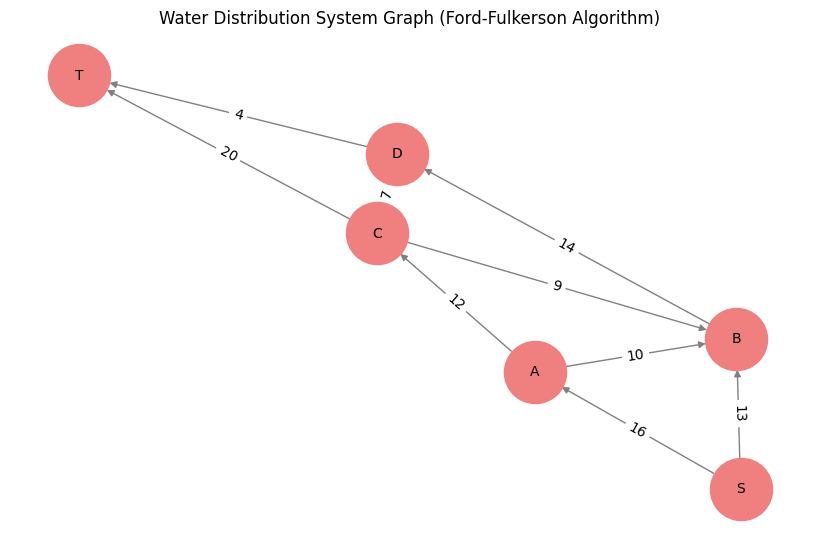

In [51]:
pos2 = nx.spring_layout(G2, seed=42)

plt.figure(figsize=(8, 5))
nx.draw(G2, pos2, with_labels=True, node_color="lightcoral", edge_color="gray",
        node_size=2000, font_size=10, arrows=True)
edge_labels = {(u, v): d['capacity'] for u, v, d in G2.edges(data=True)}
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=edge_labels, font_size=10)

plt.title("Water Distribution System Graph (Ford-Fulkerson Algorithm)")
plt.tight_layout()
plt.show()

In [55]:
# Calculate the maximum flow
max_flow_value, flow_dict = nx.maximum_flow(G2, 'S', 'T')

print(f"The maximum flow of water from S to T is: {max_flow_value}")

The maximum flow of water from S to T is: 23
